# Hierarchical Clustering

Hierarchical Clustering is an unsupervised learning algorithm that creates clusters. Hierarchical clustering creates a dendrogram or an inverted tree-like structure that graphically represents the hierarchy.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as shc

In [8]:
data = {'x1': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38, 43, 51],
        'x2': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 5, 29, 27, 8, 7 ]} 

df = pd.DataFrame(data, columns = ['x1', 'x2'])
df.head(10)

,x1,x2
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59
5,33,74
6,31,73
7,22,57
8,35,69
9,34,75


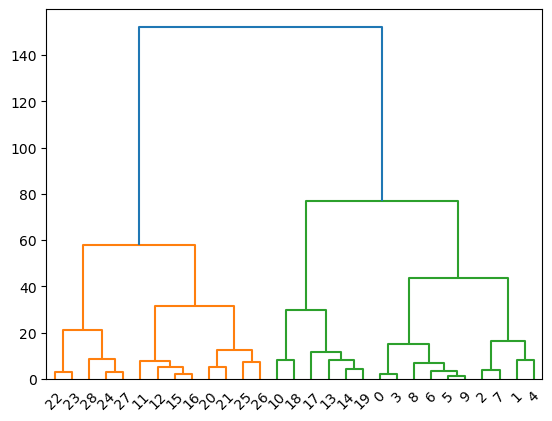

In [28]:
dend = shc.dendrogram(shc.linkage(df, method = 'ward'))

In [32]:
d = list(dend['color_list'])
np.unique(d)

array(['C0', 'C1', 'C2'], dtype='<U2')

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
aggCluster = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')

aggCluster

AgglomerativeClustering()

In [44]:
y_pred = aggCluster.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [47]:
df['label'] = y_pred
df.head()

,x1,x2,label
0,25,79,0
1,34,51,0
2,22,53,0
3,27,78,0
4,33,59,0


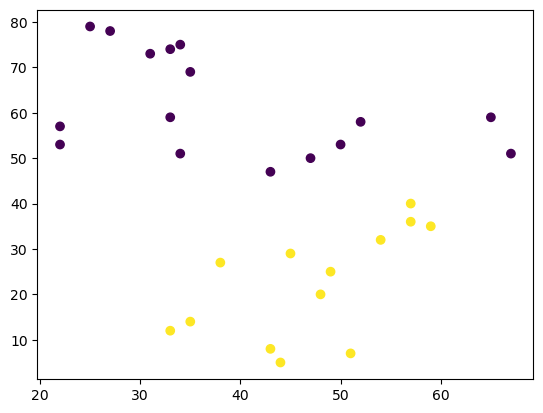

In [58]:
plt.scatter(df['x1'], df['x2'], c = df['label'])

Let's use Agglomerative Clustering on iris dataset.

In [98]:
from pydataset import data

df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [76]:
df1 = df.drop('Species', axis = 1)
df1.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')

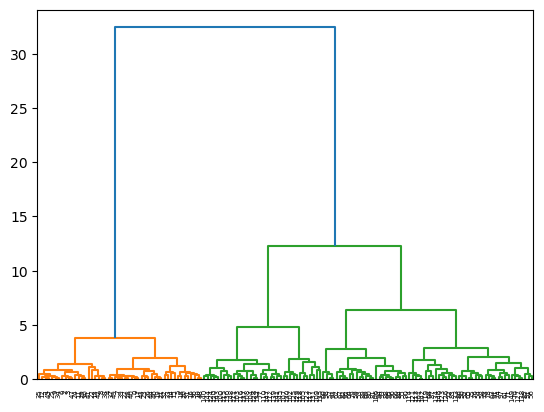

In [82]:
dend1 = shc.dendrogram(shc.linkage(df1, method = 'ward', metric = 'euclidean'))

In [88]:
aggCluster1 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

aggCluster1

AgglomerativeClustering(n_clusters=3)

In [90]:
y_pred1 = aggCluster1.fit_predict(df1)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [102]:
df['label'] = y_pred1

df.to_csv('iris.csv')